In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from deepface import DeepFace
from retinaface import RetinaFace

2023-11-10 19:02:29.691742: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 19:02:29.691773: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 19:02:29.691806: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 19:02:29.703171: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 19:02:30.658250: W tensorflow/compiler/

In [2]:
img1_path="dataset/img14.jpg"
img2_path="dataset/img11.jpg"
model="ArcFace"
detector_backend="retinaface"

2023-11-10 19:02:37.009537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-10 19:02:37.059279: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


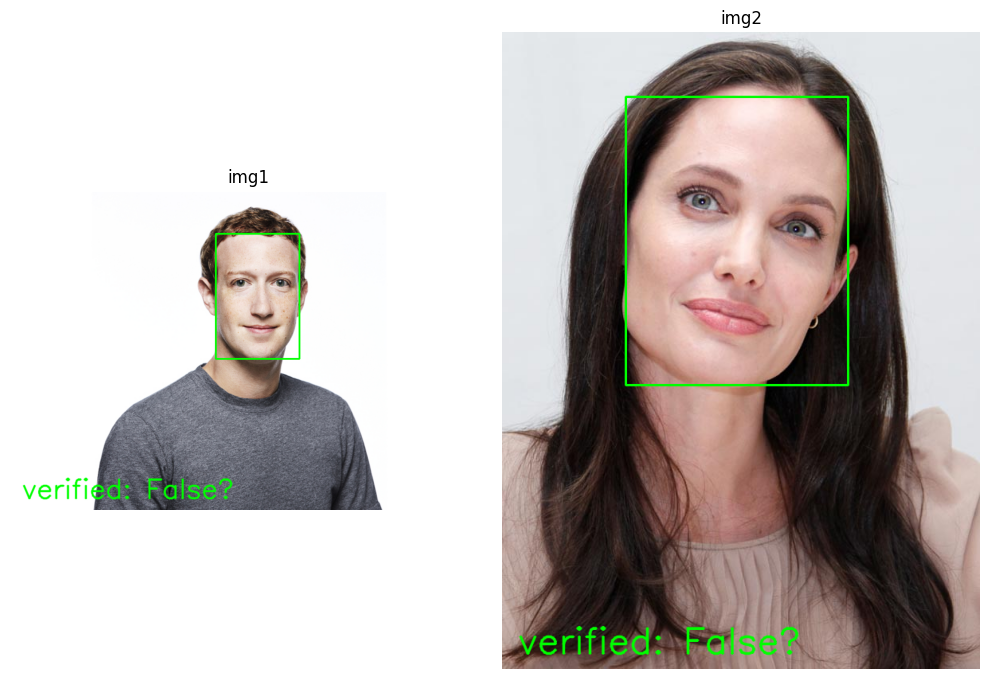

In [3]:
# Görüntü yolları
img1_path = img1_path
img2_path = img2_path

# Yüz tespiti yap
result = RetinaFace.detect_faces(img1_path)
for key in result.keys():
    identity=result[key]

    facial_area=identity["facial_area"]
    facial_areas_img1 = {'x': facial_area[0], 'y': facial_area[1],
                        'w': facial_area[2], 'h': facial_area[3]}
    break

result = RetinaFace.detect_faces(img2_path)
for key in result.keys():
    identity=result[key]

    facial_area=identity["facial_area"]
    facial_areas_img2 = {'x': facial_area[0], 'y': facial_area[1],
                        'w': facial_area[2], 'h': facial_area[3]}
    break

# Görüntü yolları
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Subplots oluştur
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Her bir img için dikdörtgen çizimi ve bilgileri al
additional_info = {}
for i, (img_name, coords) in enumerate({'img1': facial_areas_img1, 'img2': facial_areas_img2}.items()):
    img = globals()[img_name]
    cv2.rectangle(img, (coords['x'], coords['y']), (coords['w'], coords['h']), (0, 255, 0), 2)
    
    # DeepFace.verify kullanarak bilgileri al
    result = DeepFace.verify(img1_path=img1_path, img2_path=img2_path, model_name='ArcFace', detector_backend='retinaface')
    
    # Bilgileri additional_info sözlüğüne ekle
    additional_info[img_name] = {
        'verified': result['verified']}

    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(img_name)
    axs[i].axis('off')  # Eksenleri kapat

    # Bilgileri resmin altına eklemek için metin oluştur
    text = ""
    for key, value in additional_info[img_name].items():
        text += f"{key}: {value}\n"

    # Metni resmin altına ekleyerek yeni bir resim oluştur
    img_with_text = cv2.putText(img.copy(), text, (20, img.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2, cv2.LINE_AA)

    # Görüntüyü subplota ekle
    axs[i].imshow(cv2.cvtColor(img_with_text, cv2.COLOR_BGR2RGB))

# Görüntüleri düzenle
plt.tight_layout()

# Görüntüyü göster
plt.show()
